<div style="direction: rtl">
    <h1>  פרויקט ראשון בקונבולוציה - Image Classification </h1>
    <h3> מגיש: נדב סרגוסי </h3>
    <h3> פרויקט זה הינו פרויקט בסיסי ברשתות קונבולוציה, אשר מסווג תמונות לאחד משני סוגים - מכונית / לא מכונית (Car / No Car), כלומר למעשה האם יש או אין מכונית בתמונה. </h3>
    <br><br>
</div>

<div style="direction: rtl">
    <h3> לצורך הפרויקט, התבקשנו להביא נתונים מקוריים בעצמנו, ולא מתוך מערך נתונים קיים. </h3>
    <h3> לשם כך, השתמשתי באתר האינטרנט הנ"ל לצורך ייבוא מסיבי של תמונות: </h3>
    <h3><a href="https://backlinkvalidator.com/tools/image_downloader.php"> https://backlinkvalidator.com/tools/image_downloader.php </a> </h3>
    <h3> לאחר מכן, נייבא את התיקייה עם התמונות למחברת, בעזרת הפונקציה שנמצאת מטה: </h3>
</div>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

<div style="direction: rtl">
    <h3> כאן אנו למעשה מייבאים את הנתונים (התמונות) בעזרת אותה פונקציה, ומחלקים אותם לשני סטים - סט אימון (Train Set) וסט בדיקה (Validation / Test Set). </h3>
    <h3> סט האימון משמש לאימון המודל (המודל מתאמן על התמונות מסט האימון בלבד), בעוד אחוז הדיוק של המודל נקבע לפי התמונות בסט הבדיקה. </h3>
</div>

In [2]:
train_ds = image_dataset_from_directory(
    "Images for 1st conv project",
    validation_split = 0.2,
    subset = "training",
    seed = 420,
    image_size=(256, 256),
)
val_ds = image_dataset_from_directory(
    "Images for 1st conv project",
    validation_split = 0.2,
    subset = "validation",
    seed = 420,
    image_size = (256, 256),
)

Found 3465 files belonging to 2 classes.
Using 2772 files for training.
Found 3465 files belonging to 2 classes.
Using 693 files for validation.


<div style="direction: rtl">
    <h3> ניתן לראות שהפונקציה אכן זיהתה והעלתה את התמונות, 3465 במספר, לפי 2 אפשרויות סיווג (classes). בנוסף, הפונקציה מבצעת את הפיצול המדובר, כאשר סט הבדיקה מהווה 20% מסך הנתונים.</h3>
    <h3> הערה: לצורך פיצול הסטים, אין צורך לפצל את התמונות לשתי תיקיות (במחשב). החלופה העדיפה הינה מתיקייה אחת בלבד, כאשר בקריאה לכל אחת מהפונקציות, פרמטר ה-seed צריך להיות זהה. בנוסף, יש לשנות את פרמטר ה-subset בהתאם (פעם אחת ל-training, ובפעם השנייה ל-validation), כפי שיש כאן. </h3> <br><br>
</div>

<div style="direction: rtl">
    <h3> אחד הדברים החשובים ביותר בפרויקטים מן הסוג הזה, הינו ויזואליזציה (visualization) של הדברים. כלומר, תמיד נשאף להצגה ויזואלית של כמה שיותר דברים, כפי שנראה עתה וגם בהמשך. כעת, נציג דוגמאות לכמה מן התמונות במערך הנתונים. </h3>
</div>

In [3]:
import matplotlib.pyplot as plt

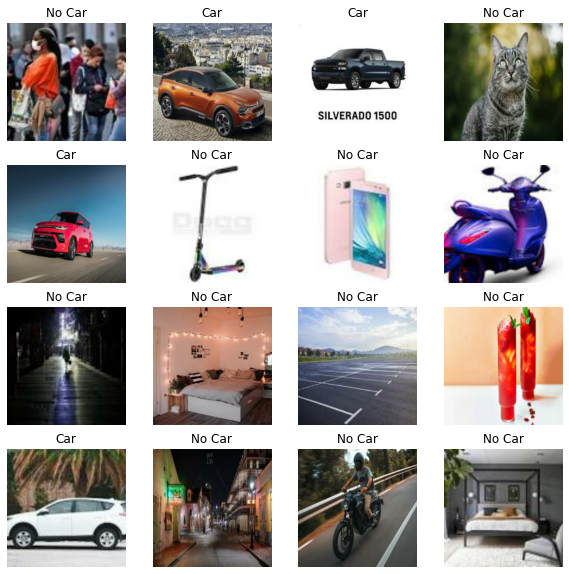

In [4]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<div style="direction: rtl">
    <br><br>
    <h3> אחד הדברים שעוזרים להביא יותר נתונים (data) לפרויקט כלשהו, הוא ביצוע אוגמנטציה (שינוי קל) של הנתונים (data augmentation). אוגמנטציה משנה קלות את התמונות הקיימות (כפי שמיד נראה), ובכך כאמור תורמת להגדלת מערך הנתונים וע"י כך שיפור המודל (משתמשים בפעולת האוגמנטציה גם בתוך המודל עצמו). </h3>
</div>

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

<div style="direction: rtl">
    <h3> דוגמא לאוגמנטציה בסיסית - הזזה קלה של זווית התמונה בכיוון רנדומלי.</h3>
</div>

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

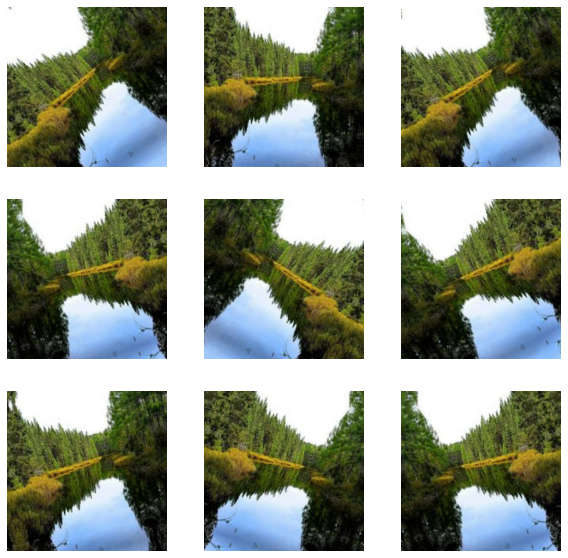

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<div style="direction: rtl">
    <h3> דוגמא לאוגמנטציה מתקדמת בהרבה.</h3>
</div>

In [8]:
advanced_data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomTranslation(
     height_factor = (-0.2, 0.3),
     width_factor = (-0.2, 0.3),
     fill_mode = "nearest",
     interpolation = "nearest"),
     layers.RandomContrast(0.1,0.1),
    ]
)

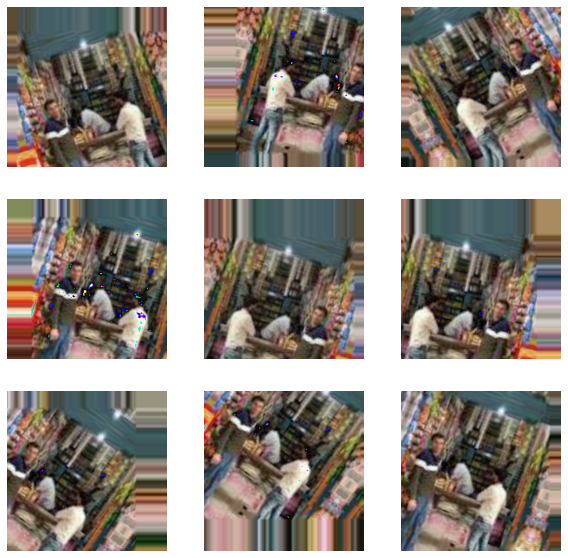

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = advanced_data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<div style="direction: rtl">
    <h3> כעת ניצור מודל קונבולוציה שמטרתו ללמוד מהתמונות באיזה מהן יש / אין מכונית. המודל הינו גרסה קטנה יחסית של הרשת Xception (רשת נוירונים מסוג Residual).</h3>
</div>

In [15]:
from keras import Sequential, regularizers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Rescaling, Activation, GlobalAveragePooling2D

In [11]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(x)
    
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x 

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual]) 
        previous_block_activation = x 

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

<div style="direction: rtl">
    <h3> כאן ניתן לראות את סיכום המודל - 51 שכבות בסך הכל, עם למעלה מ-2.7 מיליון פרמטרים נלמדים).</h3>
</div>

In [12]:
model = make_model((256, 256, 3), 2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           sequential[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         rescaling[0][0]                  
______________________________________________________________________________________________

<div style="direction: rtl">
    <h3> אימון המודל למשך 20 אפוקים והצגת גרף הלמידה:</h3>
</div>

Epoch 1/20
87/87 [==============================] - 703s 8s/step - loss: 0.3798 - accuracy: 0.8377 - val_loss: 0.8930 - val_accuracy: 0.4733
Epoch 2/20
87/87 [==============================] - 684s 8s/step - loss: 0.2614 - accuracy: 0.8997 - val_loss: 1.2784 - val_accuracy: 0.4733
Epoch 3/20
87/87 [==============================] - 685s 8s/step - loss: 0.2366 - accuracy: 0.9073 - val_loss: 1.7536 - val_accuracy: 0.4733
Epoch 4/20
87/87 [==============================] - 685s 8s/step - loss: 0.2189 - accuracy: 0.9159 - val_loss: 1.9285 - val_accuracy: 0.4733
Epoch 5/20
87/87 [==============================] - 684s 8s/step - loss: 0.1877 - accuracy: 0.9268 - val_loss: 2.4561 - val_accuracy: 0.4733
Epoch 6/20
87/87 [==============================] - 686s 8s/step - loss: 0.1915 - accuracy: 0.9275 - val_loss: 0.4965 - val_accuracy: 0.7734
Epoch 7/20
87/87 [==============================] - 685s 8s/step - loss: 0.1804 - accuracy: 0.9318 - val_loss: 0.1212 - val_accuracy: 0.9596
Epoch 8/20
87

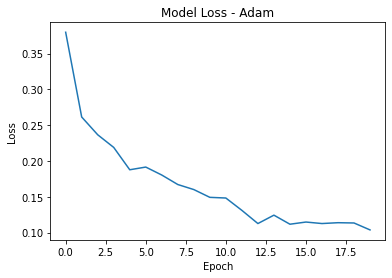

In [14]:
epochs = 20

model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    train_ds, epochs = epochs, validation_data = val_ds
)
# הצגת גרף הלמידה (מספר האפוקים לעומת סך השגיאה)
plt.plot(history.history['loss'])
plt.title('Model Loss - Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

<div style="direction: rtl">
    <h3> כפי שניתן לראות, המודל הגיע לאחוז דיוק גבוה יחסית, 94.66% על ה-Validation Set. אחוז הדיוק על ה-Train Set הינו 96.57%, כך שלא ניתן לקבוע בוודאות שיש כאן Overfit משמעותי.</h3>
    <br><br>
</div>

<div style="direction: rtl">
    <h3> כעת כדאי לשמור את המודל על המחשב, על מנת שכל הפרמטרים שכבר נלמדו יישמרו, ולא נצטרך לאמן את המודל מחדש בכל פעם שנפתח את המחברת מחדש.</h3>
</div>

In [15]:
model.save('D:/Users/nadav/1st conv model')

INFO:tensorflow:Assets written to: D:/Users/nadav/1st conv model\assets


d:\users\nadav\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


<div style="direction: rtl">
    <br><br>
    <h3> דבר מעניין שניתן לעשות כעת הוא לבדוק את המודל על תמונות שצילמתי בעצמי.</h3>
</div>

In [20]:
from keras.preprocessing.image import load_img, img_to_array

In [21]:
# כל התמונות שצילמתי
my_images = []
predictions = []
for i in range(1, 17):
    img = load_img(f"D:/Users/nadav/real photos i took for model testing/{i}.jpg", target_size = (256, 256))
    my_images.append(img)
    
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    score = model.predict(img_array)[0]
    predictions.append("No Car" if score > 0.5 else "Car")

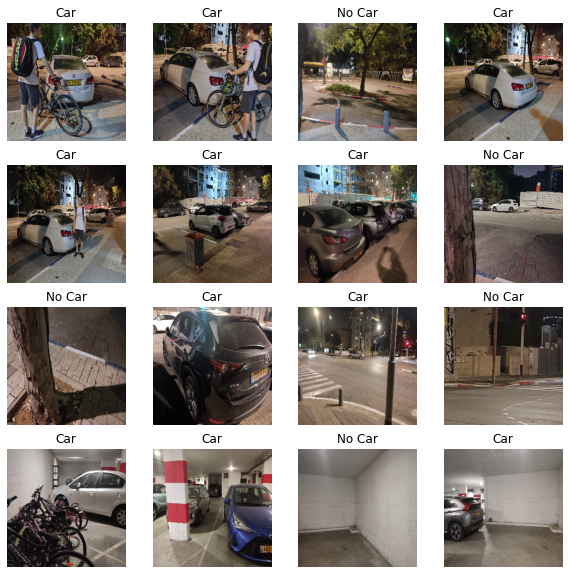

In [47]:
# הצגת התמונות שצילמתי ואת התחזית של המודל לגביהן

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(my_images[i])
    plt.title(predictions[i])
    plt.axis("off")

<div style="direction: rtl">
    <h3> ניתן לראות שהמודל עשה עבודה לא רעה בכלל וטעה רק פעם בודדת מתוך 16 התמונות.</h3>
</div>

<div style="direction: rtl">
    <br><br><br>
    <h3> השלב הבא בפרויקט הינו לבצע Transfer Learning, כלומר לקחת מודל קונבולוציה מוכן, כולל פרמטרים שכבר נלמדו על מערך נתונים אחר, ולבדוק את הביצועים על מערך הנתונים הנוכחי.</h3>
    <h3> לשם כך, נשתמש במודל המאומן Xception (המלא) על מערך הנתונים המפורסם ImageNet. </h3>
</div>

In [14]:
pretrained_model = keras.applications.Xception(
    include_top = False,
    weights = "imagenet",
    input_shape = (256, 256, 3)
)

pretrained_model.trainable = False   # על מנת שהפרמטרים המאומנים לא יילמדו מחדש

<div style="direction: rtl">
    <h3> זה המודל המוכן, אך הוא אינו מספיק לפרויקט הנוכחי. עלינו לבצע Fine Tuning, כלומר להתאים את המודל לפרויקט שלנו וכפועל יוצא גם לשפר את ביצועיו. לכן, נוסיף שכבת אוגמנטציה בהתחלה, ושכבת פלט (בסוף כמובן) עם נוירון אחד + אקטיבציית Sigmoid (מתאים לצורכי הפרויקט, אנו מבחינים בין 2 סוגים בלבד).</h3>
</div>

In [16]:
# בניית המודל

Xinput = keras.Input((256, 256, 3))
X = data_augmentation(Xinput)
X = pretrained_model(X)  # שימוש במודל המוכן מראש
X = GlobalAveragePooling2D()(X)
X = Dense(1, activation = 'sigmoid')(X)  # שכבת הסיווג מותאמת אישית לצורכי הפרויקט הנ"ל

ptmodel_application = keras.Model(Xinput, X)
ptmodel_application.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________


<div style="direction: rtl">
    <h3> ניתן לראות את סיכום המודל - רשת ה-Xception המאומנת בתוספת שכבת הקלט ושלוש שכבות מותאמות אישית שהוספנו. לרשת יש למעלה מ-20 מיליון (!) פרמטרים שנלמדו מראש. (2000 הפרמטרים הנלמדים קשורים לשכבות שהוספנו)</h3>
    <h3> עכשיו נותר לעשות fit למודל ("להלביש" עליו את נתוני הפרויקט הנ"ל) ולבסוף לבדוק את ביצועיו.</h3>
</div>

Epoch 1/20
87/87 [==============================] - 257s 3s/step - loss: 1.7748 - accuracy: 0.6457 - val_loss: 0.7836 - val_accuracy: 0.7460
Epoch 2/20
87/87 [==============================] - 264s 3s/step - loss: 0.8156 - accuracy: 0.7320 - val_loss: 0.6159 - val_accuracy: 0.7662
Epoch 3/20
87/87 [==============================] - 248s 3s/step - loss: 0.6589 - accuracy: 0.7713 - val_loss: 0.5090 - val_accuracy: 0.8167
Epoch 4/20
87/87 [==============================] - 267s 3s/step - loss: 0.5709 - accuracy: 0.7846 - val_loss: 0.6507 - val_accuracy: 0.7475
Epoch 5/20
87/87 [==============================] - 247s 3s/step - loss: 0.5790 - accuracy: 0.7962 - val_loss: 0.5044 - val_accuracy: 0.8225
Epoch 6/20
87/87 [==============================] - 236s 3s/step - loss: 0.5468 - accuracy: 0.7911 - val_loss: 0.4975 - val_accuracy: 0.8095
Epoch 7/20
87/87 [==============================] - 238s 3s/step - loss: 0.5193 - accuracy: 0.8005 - val_loss: 0.3943 - val_accuracy: 0.8514
Epoch 8/20
87

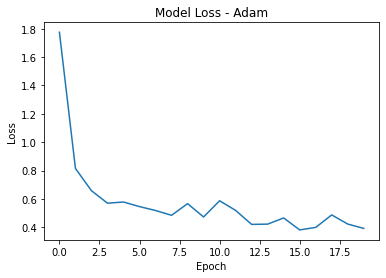

In [17]:
epochs = 20

ptmodel_application.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = ptmodel_application.fit(
    train_ds, epochs = epochs, validation_data = val_ds
)

# הצגת גרף הלמידה (מספר האפוקים לעומת סך השגיאה)
plt.plot(history.history['loss'])
plt.title('Model Loss - Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

<div style="direction: rtl">
    <h3> ובכן, המודל הגיע לביצועים טובים יחסית - 88.31% דיוק ב-Validation Set. זהו נתון מרשים, ביחס למספר הפרמטרים המועט שנלמדו בפועל (2000 לעומת 2.7 מיליון במודל הקודם שיצרנו).</h3>
    <br><br>
</div>